<a href="https://colab.research.google.com/github/tcreamype3R/Colab-Publicar/blob/main/Publicar_90d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== ESTRUCTURA DEL DATASET ===
Filas: 10, Columnas: 7

Primeras 5 filas:
                                            Post  Impresiones  Comentarios  \
0      Geo-Data Insights Newsletter - Faisalabad          802            6   
1                   Reto100DíasDataScience - PDF          735            5   
2        6 Canales Educativos Data Science & Dev          697            5   
3          De la Imagen a una Canción - AIStudio          689            0   
4  LinkedIn -Fe- Sociotécnico (Machine Learning)          681            2   

   Semanas_publicado        Tipo  Interacciones_por_1000_impresiones  \
0                  3  Newsletter                            7.481297   
1                  2   Educación                            6.802721   
2                  4    Análisis                            7.173601   
3                  8    Creativo                            0.000000   
4                  4    Análisis                            2.936858   

   Dias_publicado  
0    

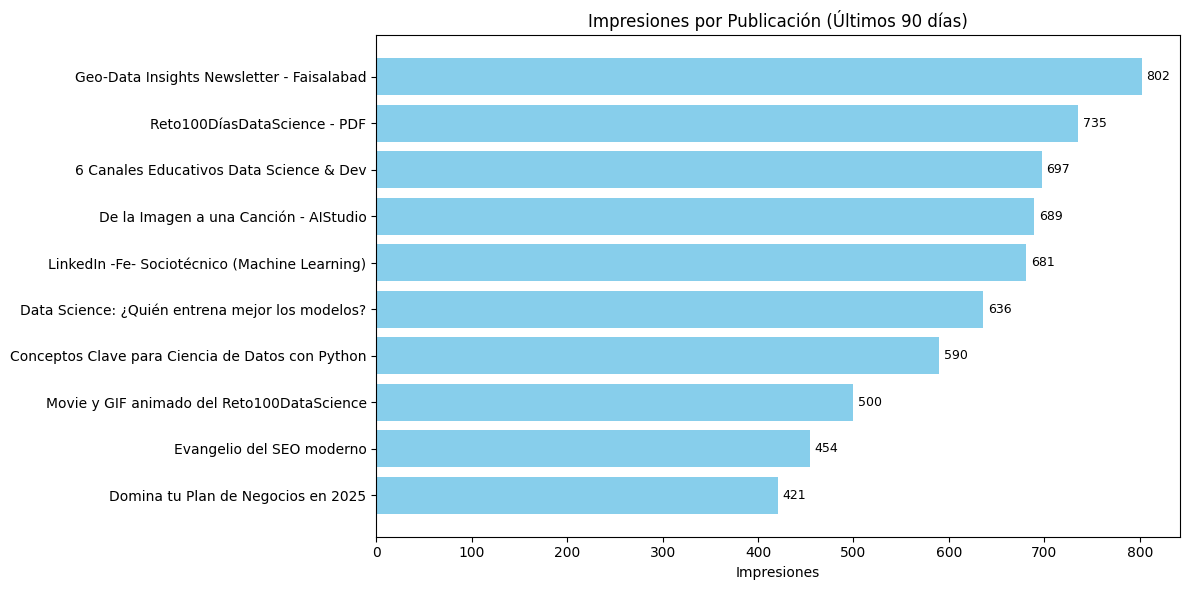

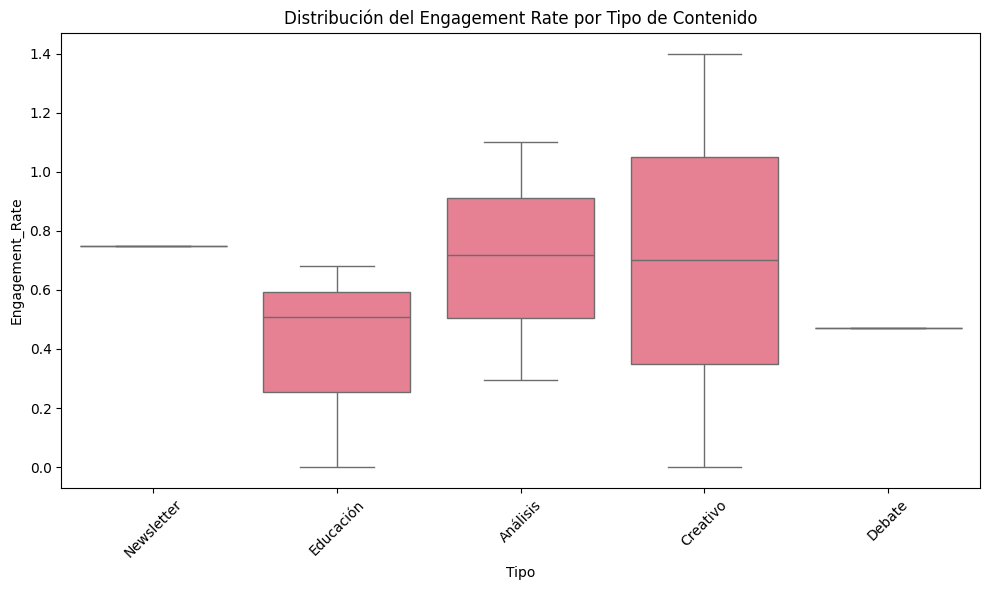

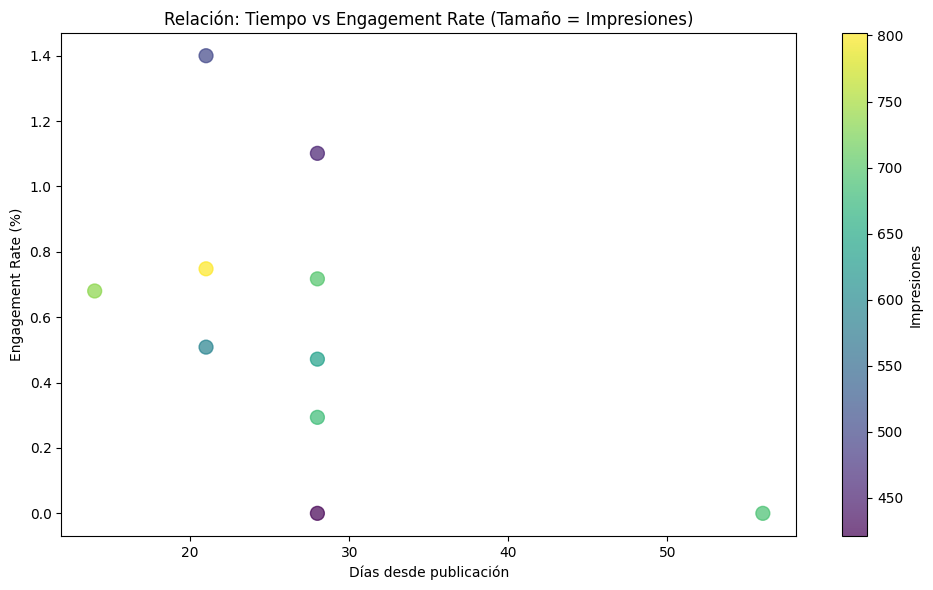


=== MATRIZ DE CORRELACIÓN ===
                 Impresiones  Comentarios  Dias_publicado  Engagement_Rate
Impresiones             1.00         0.16            0.01            -0.15
Comentarios             0.16         1.00           -0.65             0.93
Dias_publicado          0.01        -0.65            1.00            -0.54
Engagement_Rate        -0.15         0.93           -0.54             1.00

=== INSIGHTS CLAVE ===
1. Publicación con mayor alcance: Geo-Data Insights Newsletter - Faisalabad (802 impresiones)
2. Publicación con mayor engagement: Movie y GIF animado del Reto100DataScience (1.40% engagement rate)
3. Tipo de contenido con mejor performance: Newsletter (0.75% engagement rate promedio)
4. Correlación entre impresiones y comentarios: 0.16

=== RECOMENDACIONES ===
1. Crear más contenido del tipo 'Newsletter' y 'Educación' (alto alcance)
2. Incluir llamados a la acción para aumentar comentarios en publicaciones con alto alcance
3. Experimentar con formatos creativos q

In [1]:
# Script para análisis de publicaciones de LinkedIn (Últimos 90 días)
# Autor: Bernabe Aguirre Carrasco
# Objetivo: Analizar el rendimiento de las publicaciones en LinkedIn

# Instalar librerías si es necesario
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

# Datos de ejemplo (estructura basada en el documento proporcionado)
# En la práctica, estos datos podrían venir de un CSV, JSON o directamente de la API de LinkedIn
data = {
    "Post": [
        "Geo-Data Insights Newsletter - Faisalabad",
        "Reto100DíasDataScience - PDF",
        "6 Canales Educativos Data Science & Dev",
        "De la Imagen a una Canción - AIStudio",
        "LinkedIn -Fe- Sociotécnico (Machine Learning)",
        "Data Science: ¿Quién entrena mejor los modelos?",
        "Conceptos Clave para Ciencia de Datos con Python",
        "Movie y GIF animado del Reto100DataScience",
        "Evangelio del SEO moderno",
        "Domina tu Plan de Negocios en 2025"
    ],
    "Impresiones": [802, 735, 697, 689, 681, 636, 590, 500, 454, 421],
    "Comentarios": [6, 5, 5, 0, 2, 3, 3, 7, 5, 0],
    "Semanas_publicado": [3, 2, 4, 8, 4, 4, 3, 3, 4, 4],
    "Tipo": ["Newsletter", "Educación", "Análisis", "Creativo", "Análisis",
             "Debate", "Educación", "Creativo", "Análisis", "Educación"]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular métricas adicionales
df['Interacciones_por_1000_impresiones'] = (df['Comentarios'] / df['Impresiones']) * 1000
df['Dias_publicado'] = df['Semanas_publicado'] * 7

# Mostrar estructura de datos
print("=== ESTRUCTURA DEL DATASET ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\nPrimeras 5 filas:")
print(df.head())

# Análisis 1: Publicaciones con mayor alcance
print("\n=== TOP 5 PUBLICACIONES POR IMPRESIONES ===")
top_impresiones = df.nlargest(5, 'Impresiones')[['Post', 'Impresiones', 'Comentarios', 'Tipo']]
print(top_impresiones)

# Análisis 2: Publicaciones con mayor engagement rate
print("\n=== TOP 5 PUBLICACIONES POR ENGAGEMENT RATE ===")
df['Engagement_Rate'] = (df['Comentarios'] / df['Impresiones']) * 100
top_engagement = df.nlargest(5, 'Engagement_Rate')[['Post', 'Engagement_Rate', 'Impresiones', 'Comentarios']]
print(top_engagement.round(2))

# Análisis 3: Rendimiento por tipo de contenido
print("\n=== RENDIMIENTO POR TIPO DE CONTENIDO ===")
rendimiento_tipo = df.groupby('Tipo').agg({
    'Impresiones': 'mean',
    'Comentarios': 'mean',
    'Engagement_Rate': 'mean'
}).round(2).sort_values('Engagement_Rate', ascending=False)
print(rendimiento_tipo)

# Visualización 1: Impresiones por publicación
plt.figure(figsize=(12, 6))
bars = plt.barh(df['Post'], df['Impresiones'], color='skyblue')
plt.xlabel('Impresiones')
plt.title('Impresiones por Publicación (Últimos 90 días)')
plt.gca().invert_yaxis()

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Visualización 2: Engagement Rate por tipo de contenido
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Tipo', y='Engagement_Rate')
plt.xticks(rotation=45)
plt.title('Distribución del Engagement Rate por Tipo de Contenido')
plt.tight_layout()
plt.show()

# Visualización 3: Relación entre tiempo publicado y engagement
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Dias_publicado'], df['Engagement_Rate'],
                     c=df['Impresiones'], s=100, alpha=0.7, cmap='viridis')
plt.colorbar(scatter, label='Impresiones')
plt.xlabel('Días desde publicación')
plt.ylabel('Engagement Rate (%)')
plt.title('Relación: Tiempo vs Engagement Rate (Tamaño = Impresiones)')
plt.tight_layout()
plt.show()

# Análisis de correlación
correlation = df[['Impresiones', 'Comentarios', 'Dias_publicado', 'Engagement_Rate']].corr()
print("\n=== MATRIZ DE CORRELACIÓN ===")
print(correlation.round(2))

# Insights clave
print("\n=== INSIGHTS CLAVE ===")
print(f"1. Publicación con mayor alcance: {df.loc[df['Impresiones'].idxmax(), 'Post']} ({df['Impresiones'].max()} impresiones)")
print(f"2. Publicación con mayor engagement: {df.loc[df['Engagement_Rate'].idxmax(), 'Post']} ({df['Engagement_Rate'].max():.2f}% engagement rate)")
print(f"3. Tipo de contenido con mejor performance: {rendimiento_tipo.index[0]} ({rendimiento_tipo.iloc[0, 2]:.2f}% engagement rate promedio)")
print(f"4. Correlación entre impresiones y comentarios: {correlation.loc['Impresiones', 'Comentarios']:.2f}")

# Recomendaciones basadas en el análisis
print("\n=== RECOMENDACIONES ===")
print("1. Crear más contenido del tipo 'Newsletter' y 'Educación' (alto alcance)")
print("2. Incluir llamados a la acción para aumentar comentarios en publicaciones con alto alcance")
print("3. Experimentar con formatos creativos que generan buen engagement")
print("4. Monitorear el rendimiento por tipo de contenido para optimizar la estrategia")